In [18]:
import pandas as pd
import numpy as np

In [28]:
from pandas.api.types import is_string_dtype

with open("sample_dataset.csv") as file:
        bestand = pd.read_csv(file,sep=",",dtype=str)

# format the headers
bestand.columns = bestand.iloc[0]
bestand = bestand.drop(bestand.index[0])

for column in  ["Silt","Clay","Sand"]:
        if is_string_dtype(bestand[column]):
                bestand[column] = bestand[column].astype(float)
        bestand[column] = pd.to_numeric(bestand[column])

# create a dict with a df for each site - does that make sense?
unique_site_names = bestand["SITE"].unique()
df_dict = {}
for name in unique_site_names:
    temp_df = pd.DataFrame(bestand[bestand["SITE"] == name])
    df_dict[name] = temp_df

In [29]:
df_dict["Au1"]

,SITE,SYSTEM,DEPT,Clay,Silt,Sand,pH,Aggregate Stability,Bulk Density,Corg_Clay,...,Manosamine,Muramic Acid,Glucosamine,Sum Aminosugars,LAP,NAG,GLU,XYL,CEL,PHO
4,Au1,Pioneer,5,31.0134,27.9172,41.0694,7.773,0.647727272727271,1.29,0.114922904292983,...,0.131496341995654,2.65388122494279,0.786299502463911,4.96481717791973,299.694028193539,51.5049889011727,547.153640168481,158.951397745838,66.1697665030259,400.180764762632
5,Au1,Reference,5,12.6872,22.3210,64.9918,7.18,0.922558922558923,1.17,0.453448357399584,...,0.107116035569389,4.33376977924257,1.19262296017611,7.73703122912375,375.599394346831,73.8497720453037,603.421035317439,146.426445572033,85.7833642313387,441.725044060526
6,Au1,Standard,5,25.6417,24.9351,49.4232,7.955,0.980271810609382,1.51,0.152684104408054,...,0.0991162822995747,1.66392803327622,0.553362342996527,3.26804246144742,186.004186029196,34.4859364322166,473.446581626247,122.262405591672,48.8204317799376,285.605498064144
67,Au1,Pioneer,20,31.0134,27.9172,41.0694,7.858,0.656931464174455,1.29,0.118305313187203,...,0.119844835364293,1.91604790072504,0.902109474039613,4.34845302727178,159.43315528753,29.4434064564321,358.261511598114,92.9174813519371,38.6416422422617,375.642452597047
68,Au1,Reference,20,12.6872,22.3210,64.9918,7.044,0.859906604402937,1.17,0.364674632700675,...,0.0532219289529033,2.36594421850899,0.943659919076451,4.76105205709943,188.924183837273,31.9761941023521,256.033897669445,40.3912132462918,22.3703452440865,323.937951480996
69,Au1,Standard,20,25.6417,24.9351,49.4232,7.948,0.531558608844998,1.51,0.120245927532106,...,0.0544933591721425,0.887243791884208,0.434170177820104,2.0222730286944,149.307718264804,24.5640134455327,254.602473620145,47.7604058294424,23.0953940320674,287.485787134702
130,Au1,Pioneer,35,31.0134,27.9172,41.0694,7.911,0.63021420518602,1.29,0.0864561770073581,...,0,1.69132278243249,0.754954006076187,3.54280028850978,238.873477626457,60.6445589712759,428.796788979286,120.106415385911,66.8167090022174,471.442751166937
131,Au1,Reference,35,12.6872,22.3210,64.9918,7.107,0.753215434083602,1.17,0.30588151838073,...,0,1.88655756682566,0.66271513285158,3.47018907495266,307.446006834238,61.7568631799338,457.150035289387,76.0130936863337,48.6392241136044,408.354530795271
132,Au1,Standard,35,25.6417,24.9351,49.4232,7.996,0.551486428263677,1.51,0.175748097825027,...,0,0.985679602728068,0.404302937963685,1.99257514945827,204.614801317131,48.0558482429258,393.810293096968,83.6575362516277,34.5793120776948,379.040324203063


In [30]:
au_1 = df_dict["Au1"].loc["Clay","Silt","Sand"]
au1_pioneer = au_1[au_1["SYSTEM"] == "Pioneer"].to_numpy()
time = np.linspace(0,1,len(au1_pioneer))

IndexingError: Too many indexers

Initializing...
Compute Karcher Mean of 3 function in SRSF space...
updating step: r=1
updating step: r=2
updating step: r=3


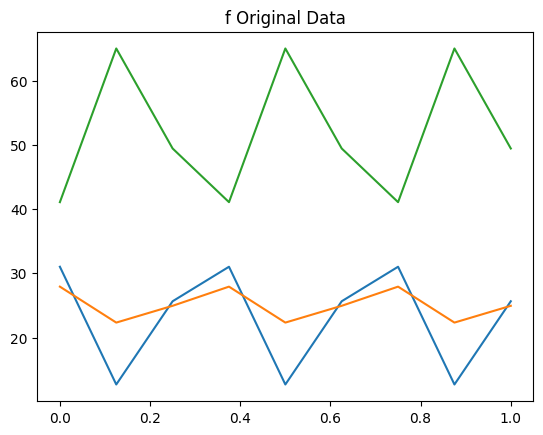

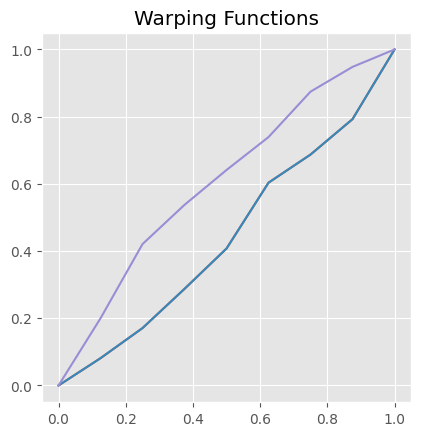

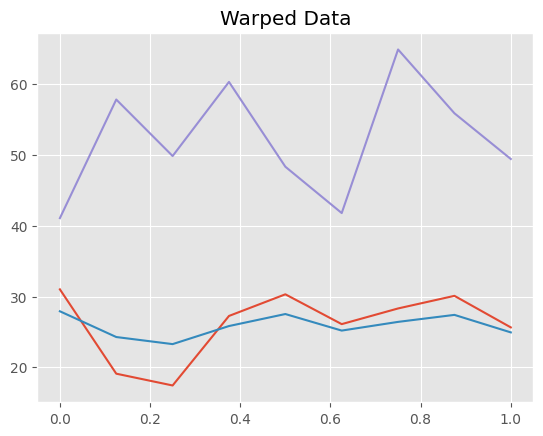

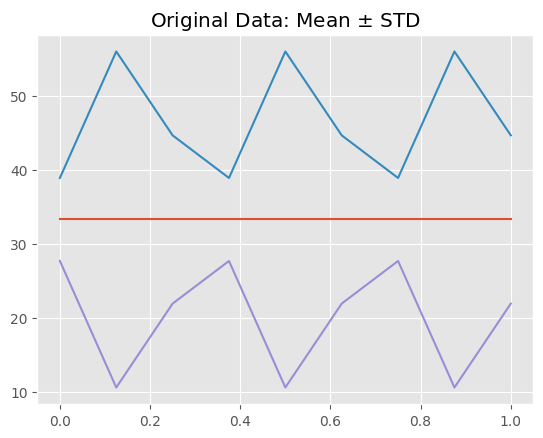

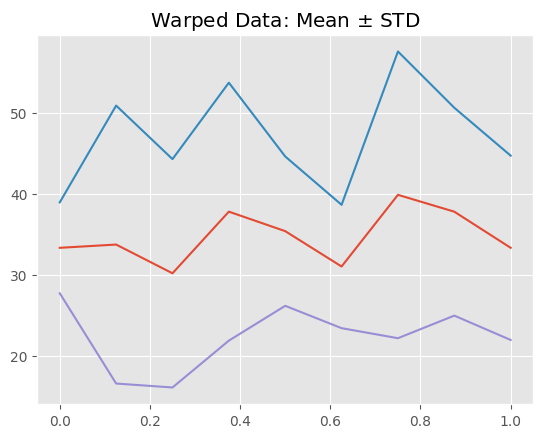

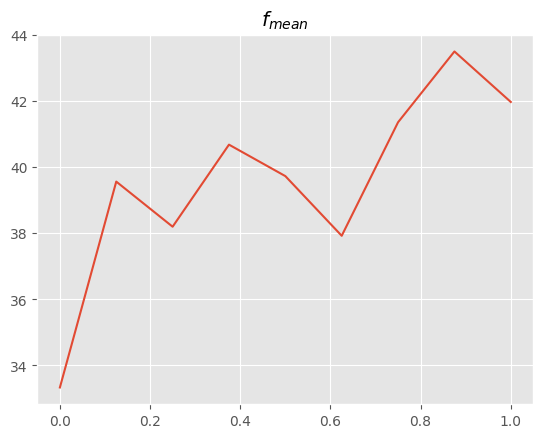

In [31]:
from fdasrsf import fPCA, time_warping, fdawarp, fdahpca

au_1 = df_dict["Au1"]
au_1 = au_1[["Clay","Silt","Sand"]]
time = np.linspace(0,1,len(au_1))
warp_f = time_warping.fdawarp(au_1.to_numpy(), time)
warp_f.srsf_align()

warp_f.plot()

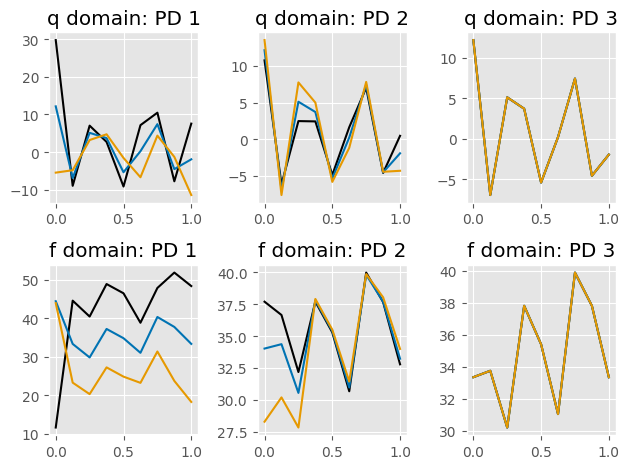

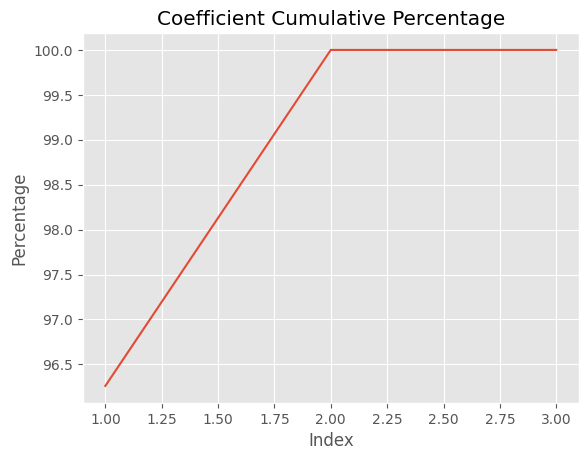

In [32]:
fPCA_analysis = fPCA.fdavpca(warp_f)

# Run the FPCA on a 3 components basis 
fPCA_analysis.calc_fpca(no=3)
fPCA_analysis.plot()

import plotly.graph_objects as go

# Plot of the 3 functions
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(y=fPCA_analysis.f_pca[:,0,0], mode='lines', name="PC1"))
fig.add_trace(go.Scatter(y=fPCA_analysis.f_pca[:,0,1], mode='lines', name="PC2"))
fig.add_trace(go.Scatter(y=fPCA_analysis.f_pca[:,0,2], mode='lines', name="PC3"))

fig.update_layout(
    title_text='<b>Principal Components Analysis Functions</b>', title_x=0.5,
)

fig.show()

In [36]:
# Coefficients of PCs against regions
fPCA_coef = fPCA_analysis.coef

# Plot of PCs against regions
fig = go.Figure(data=go.Scatter(x=fPCA_coef[:,0], y=fPCA_coef[:,1], mode='markers+text', text=["Clay","Silt","Sand"]))
fig.show()